Explorando dados do Starbucks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import os
import sys
import importlib
import functions as aux_fun
importlib.reload(aux_fun)
from datetime import datetime as dti

Lendo os dados

In [2]:
# Lendo os dados

portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
cond = transcript.person == '94de646f7b6041228ca7dec82adb97d2'
# transcript.loc[cond]

Dicionário dos dados:  

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [4]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [5]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [7]:
portfolio.shape, profile.shape, transcript.shape

((10, 6), (17000, 5), (306534, 4))

Mapping to integer

In [8]:
portfolio.id, dict_port_id = aux_fun.mapper_ids(portfolio.id)
profile.id, dict_prof_id = aux_fun.mapper_ids(profile.id)

In [9]:
transcript.person = transcript.person.map(dict_prof_id)

In [10]:
cond = transcript.person == 1510
transcript.loc[cond]

,person,event,value,time
1123,1510,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
15782,1510,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},6
31225,1510,transaction,{'amount': 27.95},54
31226,1510,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,54
38336,1510,transaction,{'amount': 27.84},84
69576,1510,transaction,{'amount': 31.75},174
81552,1510,transaction,{'amount': 17.17},204
99058,1510,transaction,{'amount': 30.49},270
111949,1510,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},336
127394,1510,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},342


In [11]:
transcript.loc[transcript.event=='offer received'].person.nunique() - profile.id.nunique() # .groupby('person', dropna=False).agg(count=('person','count')).sort_values('count')

# 6 usuários não receberam oferta

-6

In [12]:
# Abrindo a coluna de value
# transcript['valor'] = pd.DataFrame(transcript.value.to_list())
# offer_id é para ofertas completas e offer id é para ofertass enviadas

df_temp = pd.concat([transcript,pd.DataFrame(transcript.value.to_list())], axis=1)

df_temp.loc[transcript.event=='offer received']. \
    groupby(['person', 'offer id']).aggregate('count').iloc[100:110]



event  value  time  amount  offer_id  \
person offer id                                                                 
27     fafdcd668e3743c1bb461111dcafc2a4      1      1     1       0         0   
28     0b1e1539f2cc45b7b9fa7c272da2e1d7      2      2     2       0         0   
       3f207df678b143eea3cee63160fa8bed      1      1     1       0         0   
       4d5c57ea9a6940dd891ad53e9dbe8da0      1      1     1       0         0   
29     2906b810c7d4411798c6938adc9daaa5      1      1     1       0         0   
       5a8bc65990b245e5a138643cd4eb9837      2      2     2       0         0   
       9b98b8c7a33c4b65b9aebfe6a799e6d9      2      2     2       0         0   
       fafdcd668e3743c1bb461111dcafc2a4      1      1     1       0         0   
30     2298d6c36e964ae4a3e7e9706d1fb8c2      2      2     2       0         0   
       ae264e3637204a6fb9bb56bc8210ddfd      1      1     1       0         0   

                                         reward  
person offer id                                  
27     fafdcd668e3743c1bb461111dcafc2a4       0  
28     0b1e1539f2cc45b7b9fa7c272da2e1d7       0  
       3f207df678b143eea3cee63160fa8bed       0  
       4d5c57ea9a6940dd891ad53e9dbe8da0       0  
29     2906b810c7d4411798c6938adc9daaa5       0  
       5a8bc65990b245e5a138643cd4eb9837       0  
       9b98b8c7a33c4b65b9aebfe6a799e6d9       0  
       fafdcd668e3743c1bb461111dcafc2a4       0  
30     2298d6c36e964ae4a3e7e9706d1fb8c2       0  
       ae264e3637204a6fb9bb56bc8210ddfd       0

Nem todos os usuários receberam todas as ofertas disponíveis.  

Será que os que receberam foi efetivo a conversão?  

Pontos a organizar no dataset:
1. Quais usuários receberam quais ofertas
2. Quantos leram aquela oferta
3. Quantos completaram a oferta
4. Quanto foi o income para quem recebeu cada oferta

O problema parece caminhar para usar variáveis dummies.   
Cada linha será um usuário, que recebeu cada uma das ofertas diferentes, gerou uma resposta diferente e gastou uma quantidade diferente. Cada usuário também tem seus próprio dados demográficos, que podem servir para clusterização.

,gender,age,id,became_member_on,income
1083,M,98,1083,20180410,52000.0
6847,F,98,6847,20160726,91000.0
10116,M,98,10116,20170518,64000.0
13214,F,98,13214,20180104,65000.0
14313,M,98,14313,20150403,37000.0


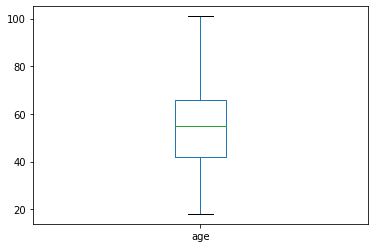

In [13]:
profile.loc[profile.age != 118].age.plot.box()
profile.loc[profile.age ==98]

In [14]:
jcol  = pd.json_normalize(transcript.value)

jcol.loc[~(pd.isna(jcol['reward']))]

,offer id,amount,offer_id,reward
12658,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
12672,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0
12679,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0
12692,NaN,NaN,ae264e3637204a6fb9bb56bc8210ddfd,10.0
12697,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0
...,...,...,...,...
306475,NaN,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0
306497,NaN,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0
306506,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0
306509,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0


In [15]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

Quando o usuário compra sem mesmo receber uma oferta, significa que ele não precisa de ofertas para comprar, o que o torna mais barato para as campanhas da empresa

O tempo vai determinar os status das ofertas. Assim, ele deve ser consolidado e resumido do dataset, usado somente para os cálculos

Campos a serem criados:
1. User
1. Ofertas recebidas
1. Ofertas visualizadas
1. Ofertas completadas
1. Transações totais

É necessário analisar usuário por usuário, criando sua time line e definindo os campos

In [16]:
cond = transcript.person == 1510
transcript.loc[cond]

,person,event,value,time
1123,1510,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
15782,1510,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},6
31225,1510,transaction,{'amount': 27.95},54
31226,1510,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,54
38336,1510,transaction,{'amount': 27.84},84
69576,1510,transaction,{'amount': 31.75},174
81552,1510,transaction,{'amount': 17.17},204
99058,1510,transaction,{'amount': 30.49},270
111949,1510,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},336
127394,1510,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},342


In [17]:
# portfolio tem 10 ids únicos
# Para cada uma dessas promoções, criar as colunas para cada usuários:
# enviada, vista, completada, transação, gasto no envio, quantidade enviada, quantidade vista, quantidade 

# Quantida de linhas
# 17000 usuários, 10 * 5 colunas = 850 mil células

In [152]:
cond = transcript.person == 1510
df_teste = transcript.loc[cond]
df_teste = df_teste.reset_index()


dicts_df = pd.json_normalize(df_teste.value)
df_teste = pd.concat([df_teste, dicts_df], axis=1)


df_teste['offer id'] = df_teste['offer id'].map(dict_port_id)
df_teste['offer_id'] = df_teste['offer_id'].map(dict_port_id)

df_joined = df_teste.merge(portfolio[['offer_type','duration', 'id']], left_on='offer id', right_on='id', how='outer')

import re

f = lambda eve: re.findall('(offer)(.*)', str(eve))[0][1]  if 'offer' in str(eve) else str(eve)

df_joined['event2'] = df_joined.event.map(f)

df_joined.duration = df_joined.duration * 24

In [161]:
df_joined = df_joined.sort_values('index')

Passo a passo para tratamento dos dados:

1. Agrupar as ofertas recebidas

1. Verificar se essas ofertas foram visualizadas dentro do intervalo de validade  
   Contabilizar taxa de visualização

1. Verificar se essas ofertas foram completadas dentro do prazo de validade
   Calcular taxa de completas

1. Verificar quais transações foram realizadas após visualizações da oferta
   Somar total

1. Somar transações sem relações com as ofertas

In [214]:
# Agrupar ofertas recebidas

df_rec = df_joined.loc[df_joined.event == 'offer received']
df_vie = df_joined.loc[df_joined.event == 'offer viewed']


df_joined.groupby('event').sum()


,index,person,time,offer id,amount,offer_id,reward,duration,id
event,,,,,,,,,
offer completed,358777.0,4530.0,870.0,0.0,0.00,24.0,15.0,0.0,0.0
offer received,713738.0,7550.0,1824.0,26.0,0.00,0.0,0.0,624.0,26.0
offer viewed,539375.0,6040.0,1290.0,26.0,0.00,0.0,0.0,456.0,26.0
transaction,1336565.0,15100.0,3204.0,0.0,261.36,0.0,0.0,0.0,0.0
